In [1]:
import numpy as np 
import networkx as nx 
import matplotlib.pyplot as plt
%matplotlib inline 

### Adjacency matrix representation 

Any graph $G$ can be represented as an *adjacency matrix*. Let's create a simple undirected, unweighted graph, visualize it and see its adjacency matrix.  

[[0 1 1 1]
 [1 0 1 0]
 [1 1 0 0]
 [1 0 0 0]]


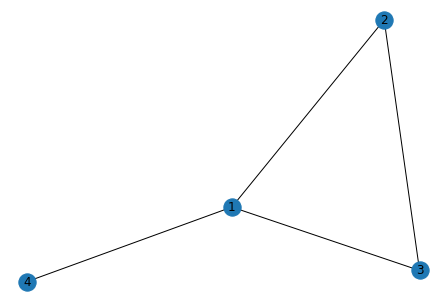

In [2]:
toy_graph = nx.empty_graph()
toy_graph.add_edge(1,2)
toy_graph.add_edge(1,3)
toy_graph.add_edge(2,3)
toy_graph.add_edge(4,1)
nx.draw(toy_graph,with_labels = True)

print(nx.adjacency_matrix(toy_graph).todense())

Another important matrix representation is the Laplacian of a graph. $L(G)=D-A$ where $D=diag(deg(1),\ldots,deg(n))$

In [3]:
L = nx.laplacian_matrix(toy_graph)
print(L.todense())

[[ 3 -1 -1 -1]
 [-1  2 -1  0]
 [-1 -1  2  0]
 [-1  0  0  1]]


*Exercise*: The number of zero eigenvalues of the Laplacian $L_G$ (i.e. the multiplicity of the 0 eigenvalue) equals the number of connected components of the graph $G$. 

In [4]:
ell, u = np.linalg.eig(L.todense())
print(sorted(ell))

[1.1102230246251565e-16, 1.0, 3.0, 4.0]


# Random graphs

1. How many labeled graphs on $n$ nodes exist? How can we sample one uniformly at random? 


The Erdős–Rényi model $G(n,p)$ tosses a coin for each possible edge $(u,v)$, and with probability $p$ it adds the edge. The ${n \choose 2}$ coin tosses are independent. 

2. How many nodes of degree k, do we expect to see in $G(n,p)$ for $k=0,\ldots,n-1$? How many edges do we expect to see in total? How many triangles? 


(array([  17.,  150.,  706., 1798., 2640., 2656., 1412.,  490.,  113.,
          18.]),
 array([ 894. ,  915.8,  937.6,  959.4,  981.2, 1003. , 1024.8, 1046.6,
        1068.4, 1090.2, 1112. ]),
 <BarContainer object of 10 artists>)

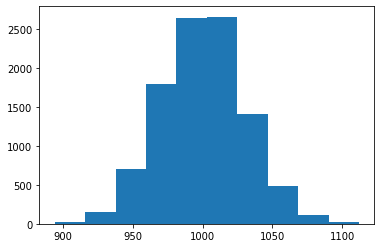

In [5]:
ER = nx.erdos_renyi_graph(10000,0.1)
degree_sequence = [d for _, d in ER.degree()]  # degree sequence
plt.hist(degree_sequence)

3. How many connected components does $G$ have? What if we decrease $p$?

In [6]:
nx.number_connected_components(ER)

1

In [7]:
sparseER = nx.erdos_renyi_graph(10000,0.0001)
nx.number_connected_components(sparseER)

5037

In [8]:
import itertools


def k4s(n=100,p=0.1):
    g = nx.erdos_renyi_graph(n,p)
    count = 0 
    for four_subset in itertools.combinations(g.nodes(), 4):
        subgraph = g.subgraph(four_subset)
        if( subgraph.number_of_edges() ==6 ):
            if(n<=20):
                print(sorted(subgraph.edges()))
            count +=1
    print('Total number of K4s in G(',n,repr(p),')', count)
    return count

k4s(20,0.001)
k4s(20,0.5)


Total number of K4s in G( 20 0.001 ) 0
[(0, 1), (0, 2), (0, 9), (1, 2), (1, 9), (2, 9)]
[(0, 1), (0, 2), (0, 14), (1, 2), (1, 14), (2, 14)]
[(0, 1), (0, 2), (0, 19), (1, 2), (1, 19), (2, 19)]
[(0, 1), (0, 7), (0, 14), (1, 7), (1, 14), (14, 7)]
[(0, 1), (0, 7), (0, 19), (1, 7), (1, 19), (19, 7)]
[(0, 1), (0, 10), (0, 14), (1, 10), (1, 14), (10, 14)]
[(0, 1), (0, 10), (0, 19), (1, 10), (1, 19), (10, 19)]
[(1, 2), (1, 4), (2, 4), (8, 1), (8, 2), (8, 4)]
[(1, 2), (1, 4), (1, 9), (2, 4), (2, 9), (4, 9)]
[(1, 2), (1, 6), (1, 9), (2, 6), (2, 9), (6, 9)]
[(1, 2), (1, 6), (1, 11), (2, 6), (2, 11), (11, 6)]
[(1, 2), (1, 6), (1, 19), (2, 6), (2, 19), (19, 6)]
[(1, 2), (1, 11), (2, 11), (8, 1), (8, 2), (8, 11)]
[(1, 2), (1, 14), (2, 14), (8, 1), (8, 2), (8, 14)]
[(1, 2), (1, 11), (2, 11), (19, 1), (19, 2), (19, 11)]
[(1, 4), (1, 5), (4, 5), (8, 1), (8, 4), (8, 5)]
[(1, 4), (1, 5), (1, 12), (4, 5), (12, 4), (12, 5)]
[(1, 4), (1, 9), (1, 12), (4, 9), (4, 12), (12, 9)]
[(1, 5), (1, 10), (8, 1), (8, 5

67

It is a fact that there exists a value $p^\star$ such that if $p\ll p^\star$ there exist no $K_4$s almost surely, while if $p\gg p^\star$ there exist $K_4$s. 

4. What is the threshold value $p^\star$?

For the answer see the lecture notes on the web page.

# Community detection

In [9]:
def generate_graph(n1=50,n2=50,p=.5,q=.1):
    sizes = [n1, n2]
    probs = [[p,q],[q,p]]
    g = nx.stochastic_block_model(sizes, probs, seed=0)
    return g 

g = generate_graph()

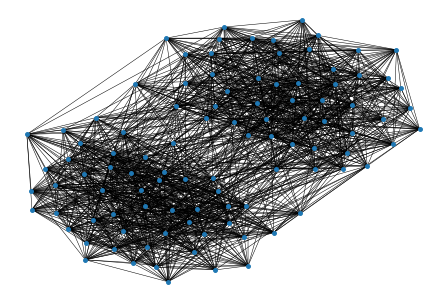

In [10]:
nx.draw(g, node_size=15, width=0.5)

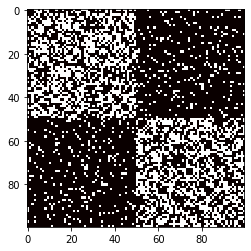

In [11]:
a = nx.to_numpy_matrix(g)
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

In [12]:
lmbd,v = np.linalg.eig(a)

(array([17., 30., 28., 21.,  2.,  0.,  0.,  1.,  0.,  1.]),
 array([-8.74486825, -4.87949378, -1.0141193 ,  2.85125517,  6.71662964,
        10.58200412, 14.44737859, 18.31275307, 22.17812754, 26.04350202,
        29.90887649]),
 <BarContainer object of 10 artists>)

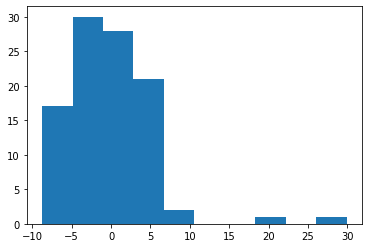

In [13]:
plt.hist(lmbd)

Let's generate a bigger graph to see again the spectrum. Again two eigenvalues are well separated from the bulk.

In [14]:
g2 = generate_graph(1000,1000)
a2 = nx.to_numpy_matrix(g2)
lmbd2, v2 = np.linalg.eig(a2)

(array([1.842e+03, 1.560e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-37.19176869,  26.64644287,  90.48465444, 154.322866  ,
        218.16107756, 281.99928913, 345.83750069, 409.67571225,
        473.51392382, 537.35213538, 601.19034695]),
 <BarContainer object of 10 artists>)

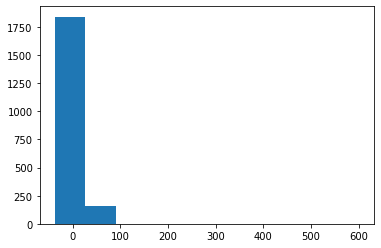

In [15]:
plt.hist(lmbd2)

Since the top two eigenvalues are not visible let's see them.

601.1903469457726   400.54884164297937


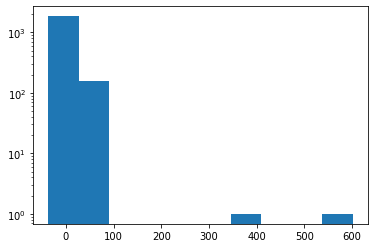

In [16]:
plt.hist(lmbd2)
plt.yscale('log')
print(lmbd2[0],' ',lmbd2[1])

Let's plot the second eigenvector of the adjacency matrix

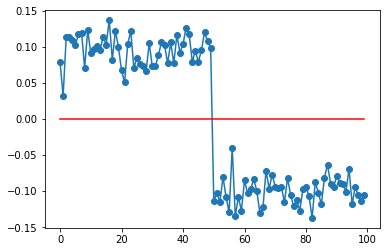

In [17]:
n = g.number_of_nodes()
plt.plot(v[:,1],'-o')
plt.plot(np.repeat(0,n),'r')

In [18]:
n1, n2 = 50, 50 #nodes in the two clusters in our example
second_eigenvector = v[:,1]
cluster1 = np.where(second_eigenvector>0,1,0).flatten()
cluster2 = np.where(second_eigenvector<=0,1,0).flatten()

In [19]:
cluster1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
cluster2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

It is clear that the second eigenvector, once rounded to positive and negative entries gives the two clusters. For fun, let's permute the node ids.  The heatmap/spy plot is no longer giving us the cluster ids by "eyeballing".

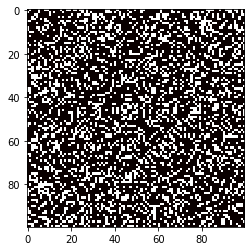

In [21]:
myperm = np.random.permutation(n)
tmp = a[:,myperm]
b = tmp[myperm,:]
plt.imshow(b, cmap='hot', interpolation='nearest')
plt.show()

In [22]:
lmbd,v = np.linalg.eig(b)

In [23]:
n1, n2 = 50, 50 #nodes in the two clusters in our example
second_eigenvector = v[:,1]
cluster1 = np.where(second_eigenvector>0,1,0).flatten()
cluster2 = np.where(second_eigenvector<=0,1,0).flatten()

Let's confirm we got the correct clusters. Indeed this is the case.

In [24]:
ground_truth_cluster1 = range(50)
sorted(myperm[np.nonzero(cluster1)])==np.array(ground_truth_cluster1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

Why does this algorithm work? Why not the top eigenvector. Let's see the basic understanding behind this algorithm known as spectral clustering.  We will answer on whiteboard the following two questions: 

1. What is the expected adjacency matrix $\mathbb{E}[A]$? 
2. What are the eigenvectors, and eigenvalues of $\mathbb{E}[A]$?
3. With tools that you can learn in higher-level classes (e.g., CS591) you can prove that the spectrum of A, and its expectation, under some conditions are close.